In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
import pandas as pd
import numpy as np
import seaborn as sns
import fiona
import cbsodata
import pyproj

In [2]:
buurten = gpd.read_file("data/neighborhoods/buurten.shp").drop(columns=["OPPERVLAKT","OMTREK","WIJKBUURTC","WIJKCODE","OCE_ID"])

In [41]:
buurt_name_list = pd.read_csv("data/buurten.csv",sep=";")
buurt_code = buurt_name_list[["BUURTCODE","BUURTNAAM"]]

In [4]:
education_17 = pd.read_csv("data/education17.csv",sep=";",decimal=",")

In [5]:
income_17 = pd.read_csv("data/income10-19.csv",sep=";",decimal=",")

In [3]:
buurt_data_19 = pd.DataFrame(cbsodata.get_data("84583NED"))

In [4]:
dh_buurt_data_19 = buurt_data_19[(buurt_data_19["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_19["SoortRegio_2"]=="Buurt     ")]
total_dh_19 = dh_buurt_data_19[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23','GemiddeldeHuishoudensgrootte_32','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_84','RUCultuurRecreatieOverigeDiensten_88','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western','GemiddeldeHuishoudensgrootte_32':'avg_household_size','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_84':'horeca_biz','RUCultuurRecreatieOverigeDiensten_88':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)

In [11]:
total_dh_19 = total_dh_19.sort_index()

In [12]:
buurten["BUURTCODE"] = buurten["BUURTCODE"].astype("int")

In [13]:
buurten = buurten.set_index("BUURTCODE").sort_index()

In [14]:
buurten["total_citizens"] = total_dh_19["total_citizens"]

In [10]:
buurten.crs

{'proj': 'sterea',
 'lat_0': 52.15616055555555,
 'lon_0': 5.38763888888889,
 'k': 0.9999079,
 'x_0': 155000,
 'y_0': 463000,
 'ellps': 'bessel',
 'units': 'm',
 'no_defs': True}

In [11]:
#for some stupid reason, this function is really broken in Anaconda. I am too tired too fix it so I'll use an online converter.
buurten = buurten.to_crs('EPSG:28992')

RuntimeError: b'no arguments in initialization list'

In [12]:
buurten = buurten.reset_index()

In [13]:
buurten = buurten.rename(columns= {"total_citizens":"c_total"})

In [38]:
#buurten.to_file("output/buurten.shp")

ERROR:fiona._env:Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


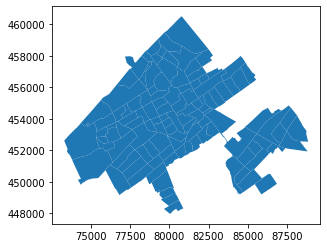

In [14]:
buurten.plot()

In [72]:
#TODO add distance to school!
amenities_data = dh_buurt_data_19[['WijkenEnBuurten','GIHandelEnHoreca_84',
 'RUCultuurRecreatieOverigeDiensten_88','AfstandTotHuisartsenpraktijk_95',
 'AfstandTotGroteSupermarkt_96', 'AfstandTotKinderdagverblijf_97']].rename(columns={'WijkenEnBuurten':'buurtname'}).merge(buurt_code, left_on='buurtname',
                                right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)

In [73]:
amenities_data = amenities_data.rename(columns={'GIHandelEnHoreca_84':"b_horeca",
 'RUCultuurRecreatieOverigeDiensten_88':"b_culture",'AfstandTotHuisartsenpraktijk_95':"d_gp",
 'AfstandTotGroteSupermarkt_96':"d_super", 'AfstandTotKinderdagverblijf_97':"d_nursery"}).sort_index()

In [75]:
amenities_data.to_csv("output/amenities_data.csv")

In [ ]:
citizen_data = dh_buurt_data_19[['WijkenEnBuurten','Mannen_6',
 'Vrouwen_7','k_15Tot25Jaar_9','k_25Tot45Jaar_10',
 'k_45Tot65Jaar_11','k_65JaarOfOuder_12','WestersTotaal_17',
 'Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21',
 'Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname'}).merge(buurt_code, left_on='buurtname',
                                right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)

In [ ]:
citizen_data = citizen_data.rename(columns={'Mannen_6':"men",
 'Vrouwen_7':"women",'k_15Tot25Jaar_9':"a_young",'k_25Tot45Jaar_10':"a_2540",
 'k_45Tot65Jaar_11':"a_4065",'k_65JaarOfOuder_12':"a_old",'WestersTotaal_17':"c_western",
 'Marokko_19':'c_morocco','NederlandseAntillenEnAruba_20':"c_antilles",'Suriname_21':"c_suriname",
 'Turkije_22':"c_turkey",'OverigNietWesters_23':"c_nonwestern"}).sort_index()

In [ ]:
citizen_data["a_middle"] = citizen_data["a_2540"] + citizen_data["a_4065"]

In [ ]:
citizen_data = citizen_data.drop(["a_2540","a_4065"],axis=1)

In [ ]:
citizen_data.to_csv("output/citizen_data.csv")

In [110]:
education_data = education_17[education_17["Buurtcode"].notna()].drop(columns=["Wijk","Wijkcode","bevolking","dekkingsgraad","RSF_Laag","RSF_Middelbaar","RSF_Hoog"]).rename(columns={"Laag":"e_low","Middelbaar":"e_middle","Hoog":"e_high"})
education_data["Buurt"] = education_data["Buurt"].str.strip()

In [113]:
education_data = education_data.merge(buurt_code,left_on="Buurtcode", right_on="BUURTCODE",validate="1:1").drop(columns=["Buurtcode","Buurt"]).set_index("BUURTCODE").sort_index()

In [126]:
#To prevent erros further down the line, the average is assumed for neighborhoods without available data.
education_data.loc[70] = education_data[education_data["e_low"]!=0].mean()
education_data.loc[106] = education_data[education_data["e_low"]!=0].mean()
education_data.loc[107] = education_data[education_data["e_low"]!=0].mean()
education_data.loc[109] = education_data[education_data["e_low"]!=0].mean()
education_data.loc[110] = education_data[education_data["e_low"]!=0].mean()
education_data.loc[116] = education_data[education_data["e_low"]!=0].mean()
education_data.loc[117] = education_data[education_data["e_low"]!=0].mean()

In [127]:
education_data.fillna(0).to_csv("output/education_data.csv")

In [66]:
set(sorted(list(buurt_code["BUURTNAAM"]))).difference(set(sorted(list(dh_buurt_data_19["WijkenEnBuurten"]))))

set()

In [43]:
set(sorted(list(dh_buurt_data_19["WijkenEnBuurten"]))).difference(set(sorted(list(buurt_code["BUURTNAAM"]))))

{'Parkbuurt oosteinde', 'Tedingerbuurt'}

In [30]:
list(buurt_code["BUURTNAAM"])

['Bosweide',
 'Tedingerbroek',
 'De Reef',
 'Lage Veld',
 'Zonne Veld',
 'Vlietzoom-West',
 'Vliegeniersbuurt',
 'Kijkduin',
 'Bohemen en Meer en Bos',
 'Morgenstond-West',
 'Morgenstond-Oost',
 'Ockenburgh',
 'Componistenbuurt',
 'Waldeck-Noord',
 'Kom Loosduinen',
 'Van Hoytemastraat e.o.',
 'Morgenstond-Zuid',
 'Bosjes van Pex',
 'Rosenburg',
 'Eykenduinen',
 'Leyenburg',
 'Nassaubuurt',
 'Haagse Bos',
 'Bloemenbuurt-West',
 'Bloemenbuurt-Oost',
 'Bomenbuurt',
 'Vruchtenbuurt',
 'Heesterbuurt',
 'Valkenboskwartier',
 'Binckhorst',
 'Rietbuurt',
 'Laakhaven-Oost',
 'Moerwijk-Oost',
 'Groente- en Fruitmarkt',
 'Laakhaven-West',
 'Spoorwijk',
 'Laakkwartier-West',
 'Laakkwartier-Oost',
 'Noordpolderbuurt',
 'Rustenburg',
 'Oostbroek-Noord',
 'Transvaalkwartier-Noord',
 'Transvaalkwartier-Midden',
 'Uilennest',
 'De Rivieren',
 'De Lanen',
 'De Velden',
 'De Vissen',
 'Zijden, Steden en Zichten',
 'Duinzigt',
 'Waalsdorp',
 'Arendsdorp',
 'Kerketuinen en Zichtenburg',
 'Houtwijk',
 'Ven

In [64]:
#I like red error messages, do you?
dh_buurt_data_19["WijkenEnBuurten"].loc[5805] = 'Tedingerbroek'
dh_buurt_data_19["WijkenEnBuurten"].loc[5796] = 'Parkbuurt Oosteinde'

C:\Users\joche\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\joche\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\joche\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
dh_buurt_data_19[dh_buurt_data_19["WijkenEnBuurten"]=="Parkbuurt oosteinde"]

,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,...,AfstandTotKinderdagverblijf_97,AfstandTotSchool_98,ScholenBinnen3Km_99,OppervlakteTotaal_100,OppervlakteLand_101,OppervlakteWater_102,MeestVoorkomendePostcode_103,Dekkingspercentage_104,MateVanStedelijkheid_105,Omgevingsadressendichtheid_106


In [67]:
housing_data = dh_buurt_data_19[['WijkenEnBuurten','GemiddeldeHuishoudensgrootte_32','Woningvoorraad_34',
 'GemiddeldeWoningwaarde_35','PercentageBewoond_38','PercentageOnbewoond_39',
 'Koopwoningen_40','HuurwoningenTotaal_41','InBezitWoningcorporatie_42',
 'InBezitOverigeVerhuurders_43']].rename(columns={'WijkenEnBuurten':'buurtname'}).merge(buurt_code, left_on='buurtname',
                                right_on='BUURTNAAM').set_index("BUURTCODE").drop("BUURTNAAM",axis=1)

In [68]:
housing_data = housing_data.rename(columns={'GemiddeldeHuishoudensgrootte_32':"avg_household_size","Woningvoorraad_34":"houses","GemiddeldeWoningwaarde_35":"avg_price","PercentageBewoond_38":"p_occupied","PercentageOnbewoond_39":"p_free","Koopwoningen_40":"bought_houses","HuurwoningenTotaal_41":"rented_houses","InBezitWoningcorporatie_42":"rent_corp","InBezitOverigeVerhuurders_43":"rent_private"}).sort_index()

In [70]:
housing_data.fillna(0).to_csv("output/housing_data.csv")

In [70]:
income_data = income_17[["Buurten","Gem. persoonlijk 52 weken inkomen individuen|2017"]].drop(index=114)

In [72]:
income_data["Buurten"] = income_data["Buurten"].str.extract('(\d+)', expand=False).astype("int64")

In [76]:
income_data = income_data.merge(buurt_code, left_on='Buurten',right_on='BUURTCODE',validate="1:1").drop(columns="Buurten").set_index("BUURTCODE")

In [79]:
income_data = income_data.rename(columns={"Gem. persoonlijk 52 weken inkomen individuen|2017":"income"})

In [80]:
income_data.fillna(0).to_csv("output/income_data.csv")

In [ ]:
pd.DataFrame(sorted(buurt_code["BUURTCODE"])).to_csv("output/buurtcodes.csv")

In [144]:
new = pd.DataFrame()
new["income"] = income_data["income"]
new["price"] = housing_data["avg_price"]*1000

In [163]:
newer = new.dropna()

In [164]:
from scipy.stats import linregress
x = newer["income"]
y = newer["price"]

linregress(x,y)

LinregressResult(slope=9.353958450121073, intercept=-68248.85211589467, rvalue=0.9492772472690186, pvalue=1.486652711891984e-52, stderr=0.3083045201472192)

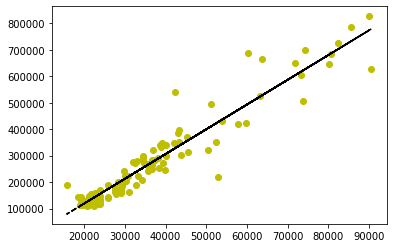

In [166]:
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')

In [168]:
#Looking at the fitted line, a correlation factor of 9.35 is found between income and house value
poly1d_fn

poly1d([ 9.35395845e+00, -6.82488521e+04])